In [346]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

#Importing dataset
housing = pd.read_csv("C:/Users/Teenu/Python_practice/Adv_Regression_Assignment/train.csv")
#Displaying the first 5 records of the dataset
print(housing.head())

#Display the info of the dataset:columns, not null fields,datatype
housing.info()

print("\n Shape of the dataset: ")
print(housing.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [347]:
housing.describe()
#Provides the statistical information. A few of the features have difference between mean and median which indicates that there are outliers.

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [348]:
#Validating if any of the fields have null values:
print(housing.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [349]:
#checking percentage of null values in each column

df_missing=pd.DataFrame((round(100*(housing.isnull().sum()/len(housing.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [350]:
#Missing value imputations

# In column 'PoolQC' (Pool quality), NaN stands for No Pool
housing['PoolQC'] = housing['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, meaning the house has no miscellaneous features.
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')

# In column 'Alley', NaN stands for No Alley Access as per the data dictionary
housing['Alley'] = housing['Alley'].fillna('No_Alley_Access')

# In column 'Fence' (Fence Quality), NaN stands for No Fence as per the data dictionary
housing['Fence'] = housing['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace as per the data dictionary
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('No_Fireplace')

# LotFrontage stands for Linear feet of street connected to property, there is no explanation to impute this in data dictionary
# Let's consider imputing it with median of the lotFrontage of houses in the same neighbourhood

# Group data by neighborhood and impute missing value with median LotFrontage of all the neighborhood
housing["LotFrontage"] = housing.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# In column 'GarageYrBlt' (Gargae Year Built), NaN stands for houses with no garage, let's impute with 0
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)

# 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data dictionary.let's impute NaN values here with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    housing[col] = housing[col].fillna('No_Garage')

#BsmtFinType1, BsmtFinType2 (Rating of basement finished area),
#BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
#These are all parameter related to basement. A NaN value probably signifies that the house does not have a basement.
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    housing[col] = housing[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode "None"
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode 0 corresponding to None
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), let's impute NaN with "Other"
housing['Electrical'] = housing['Electrical'].fillna("Other")

In [351]:
#Revalidating percentage of null values in each column

df_missing=pd.DataFrame((round(100*(housing.isnull().sum()/len(housing.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
Id,0.0
CentralAir,0.0
GarageYrBlt,0.0
GarageType,0.0
FireplaceQu,0.0
Fireplaces,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0


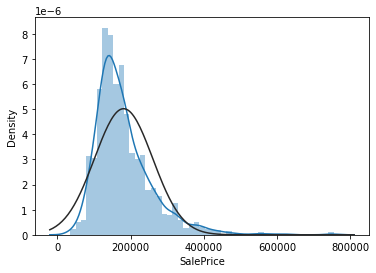

In [175]:
# Visualization of the spread of Target Variable 'Sale Price'
from scipy.stats import norm
sns.distplot(housing['SalePrice'], fit=norm)
plt.show()

#The Sale Price distribution is not normally distributed, it is a little positively skewed with some houses having really high Sale Price

In [352]:
## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, so let's convert that.

housing=housing.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

In [353]:

numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [354]:
#changing data type of Gararge yr built to int from float
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)
#DERIVED VARIABLES which might make more sense than year

housing['Age'] = housing['YrSold'] - housing['YearBuilt']
housing['Remod_Age'] = housing['YrSold'] - housing['YearRemodAdd']
housing['Garage_Age'] = housing['YrSold'] - housing['GarageYrBlt']
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

#converting from int type to object to treat the variables as categorical variables
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['OverallQual'] = housing['OverallQual'].astype('object')
housing['OverallCond'] = housing['OverallCond'].astype('object')
housing['BsmtFullBath'] = housing['BsmtFullBath'].astype('object')
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].astype('object')
housing['FullBath'] = housing['FullBath'].astype('object')
housing['HalfBath'] = housing['HalfBath'].astype('object')
housing['BedroomAbvGr'] = housing['BedroomAbvGr'].astype('object')
housing['KitchenAbvGr'] = housing['KitchenAbvGr'].astype('object')
housing['TotRmsAbvGrd'] = housing['TotRmsAbvGrd'].astype('object')
housing['Fireplaces'] = housing['Fireplaces'].astype('object')
housing['GarageCars'] = housing['GarageCars'].astype('object')
#housing.info()
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,Remod_Age,Garage_Age
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,0,0,0,0,0,2,208500,5,5,5
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,0,0,0,0,0,5,181500,31,31,31
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,0,0,0,0,0,9,223500,7,6,7
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,272,0,0,0,0,2,140000,91,36,8
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,0,12,250000,8,8,8


In [355]:
categorical_features=housing.select_dtypes(include='object')
categorical_features.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [356]:
# label encode ordinal features where there is order in categories

housing = housing.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )

housing.BsmtCond = housing.BsmtCond.astype(int)

In [357]:
categorical_features=housing.select_dtypes(include='object')
categorical_features.columns

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageCars', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [358]:
#changing months to categorical
import calendar

housing['MonthSold'] = housing['MoSold'].apply(lambda x: calendar.month_name[x])
housing=housing.drop(['MoSold'], axis=1)

In [359]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.columns


Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'SalePrice', 'Age', 'Remod_Age',
       'Garage_Age'],
      dtype='object')

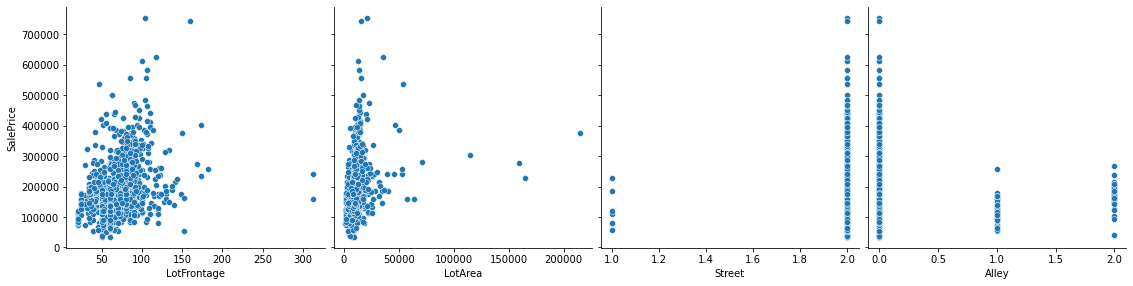

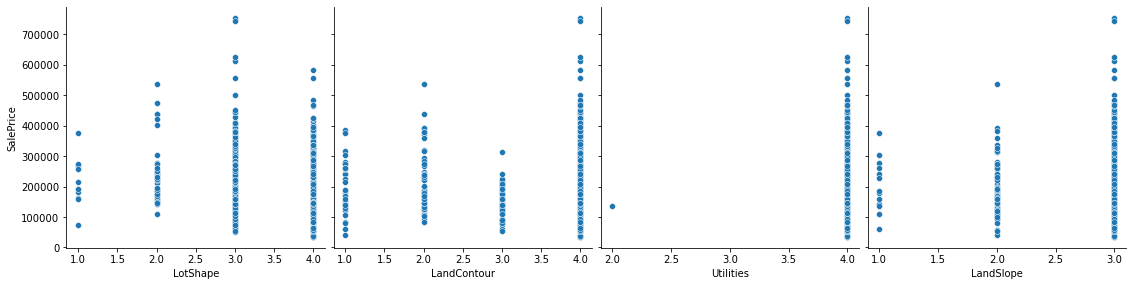

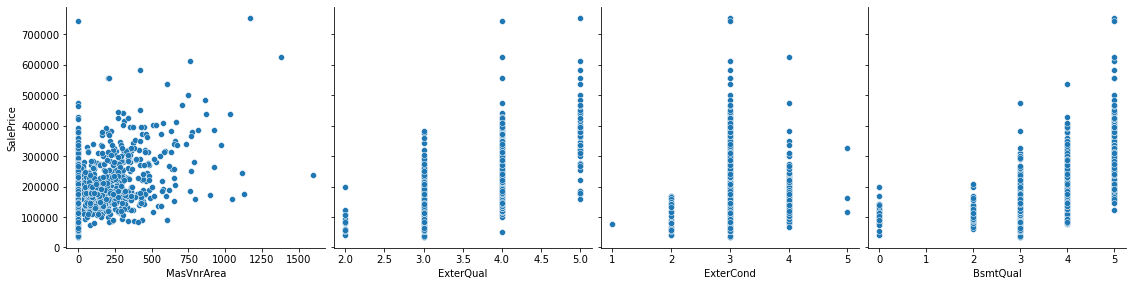

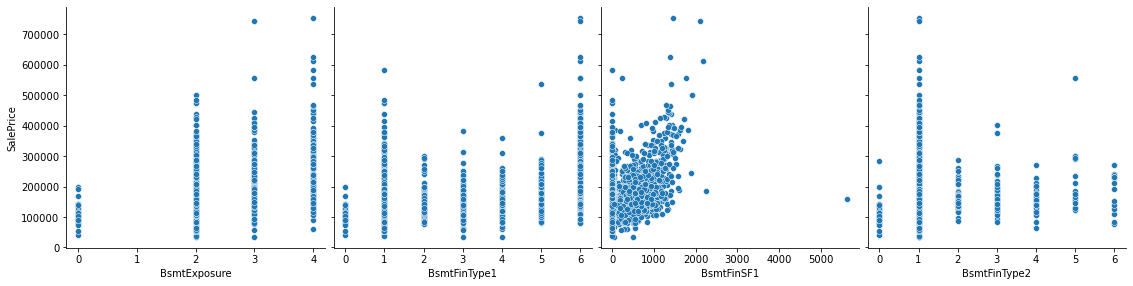

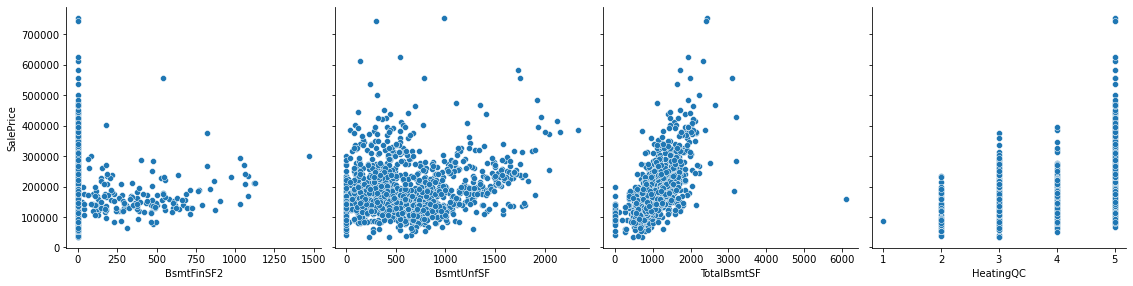

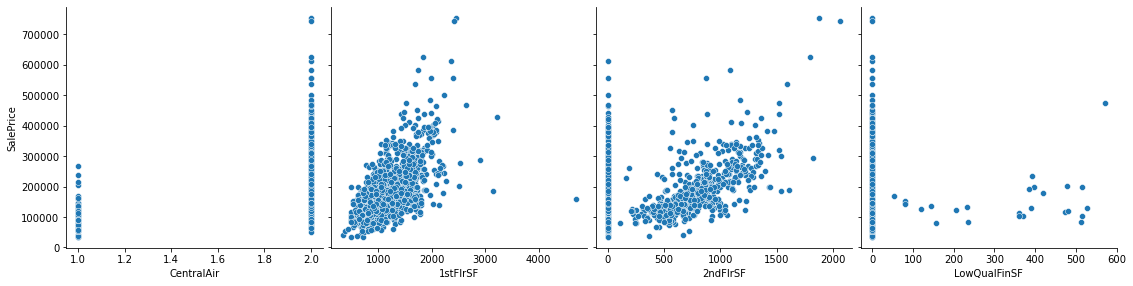

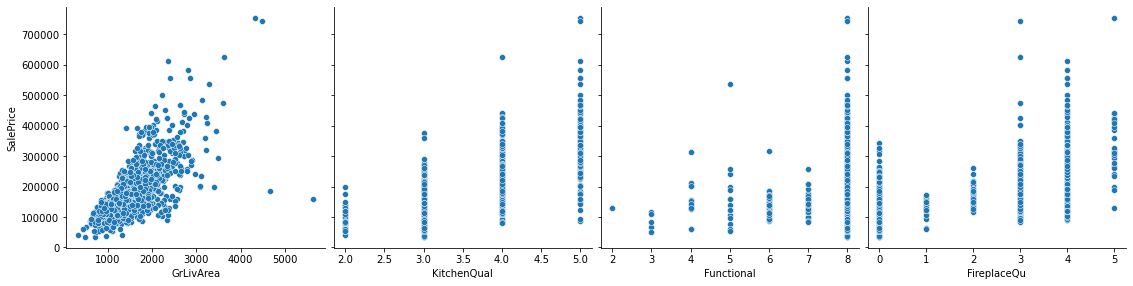

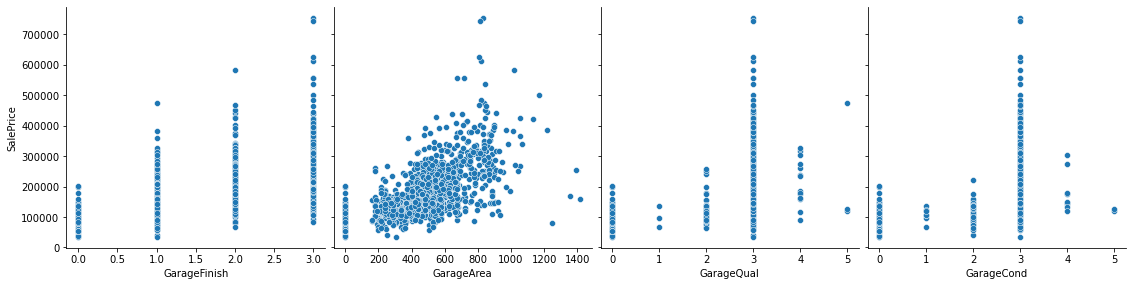

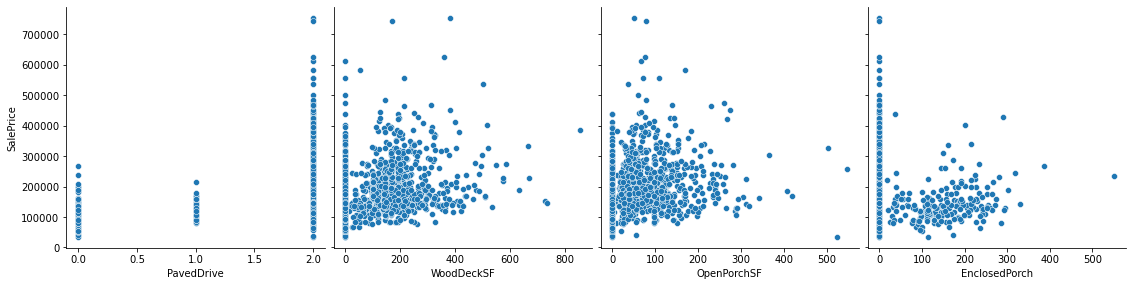

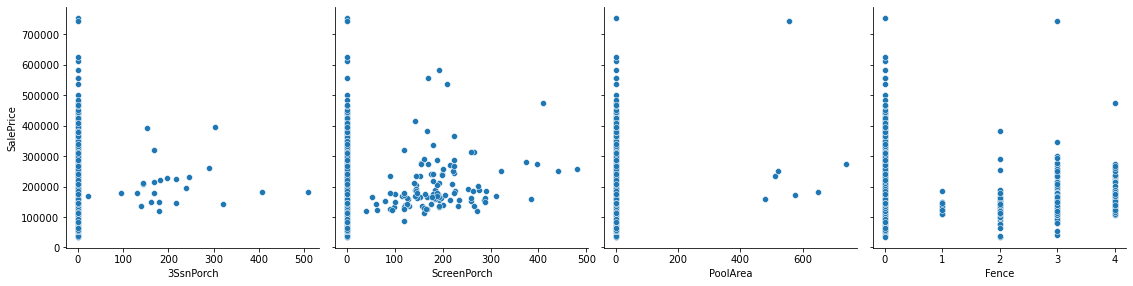

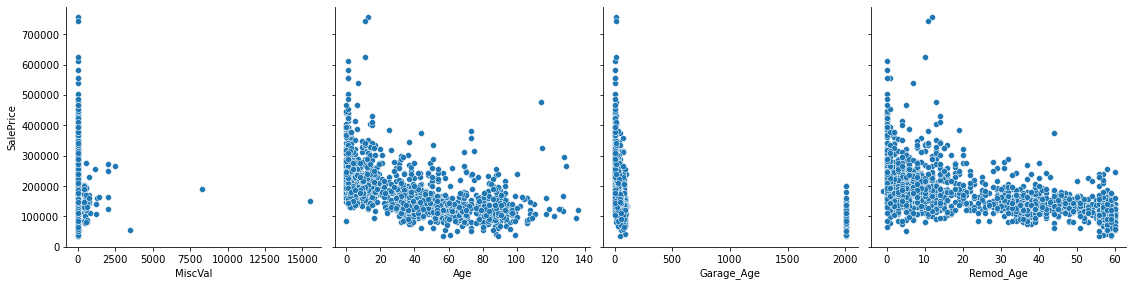

In [360]:
#Pair plots of the numeric variables vs the SalePrice
def num_pair_plot(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()
    
num_pair_plot('LotFrontage', 'LotArea', 'Street', 'Alley')
num_pair_plot('LotShape', 'LandContour','Utilities', 'LandSlope')
num_pair_plot('MasVnrArea', 'ExterQual', 'ExterCond','BsmtQual')

num_pair_plot('BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2')
num_pair_plot('BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC')
num_pair_plot('CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF')
num_pair_plot('GrLivArea','KitchenQual', 'Functional', 'FireplaceQu')
num_pair_plot('GarageFinish','GarageArea', 'GarageQual', 'GarageCond')
num_pair_plot('PavedDrive', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch')
num_pair_plot('3SsnPorch', 'ScreenPorch', 'PoolArea','Fence')
num_pair_plot('MiscVal', 'Age','Garage_Age','Remod_Age')


Bivariate Analysis: Purpose of OverallQual vs SalePrice



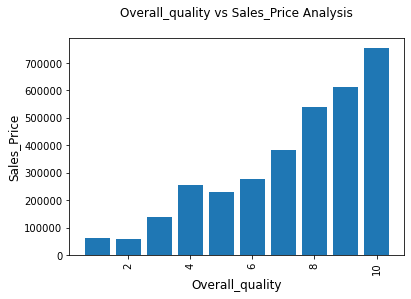

In [361]:

##Bivariate Analysis: Purpose of Overall_quality vs Sales_Price
print("\nBivariate Analysis: Purpose of OverallQual vs SalePrice\n")

Overall_quality=np.array(housing['OverallQual'])
Sales_Price=np.array(housing['SalePrice'])

plt.bar(Overall_quality,Sales_Price)
plt.title("Overall_quality vs Sales_Price Analysis\n")
plt.xlabel("Overall_quality",fontdict={'fontsize':12,'fontweight':5})
plt.ylabel("Sales_Price",fontdict={'fontsize':12,'fontweight':5})
plt.xticks(rotation=90)
plt.show()

#The Sales Price is the highest for the house which have an overall quality of 10 which is Very Excellent.

Box plot of Living_Area vs SalePrice



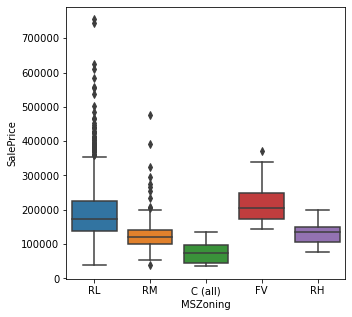

In [369]:
##Bivariate Analysis: Purpose of Living_Area vs Sales_Price
print("Box plot of Zone_Classification vs SalePrice\n")
plt.figure(figsize=(5,5))
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing)
plt.show()

#Houses which belong to Floating Village Residential(FV) are showing median of greater than 200000

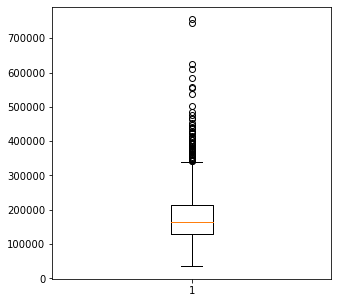

In [370]:
#Outlier treatment
# Box plot helps in displaying the Outliers for Sale Price
plt.figure(figsize=(5,5))
plt.boxplot(housing['SalePrice'])
plt.show()

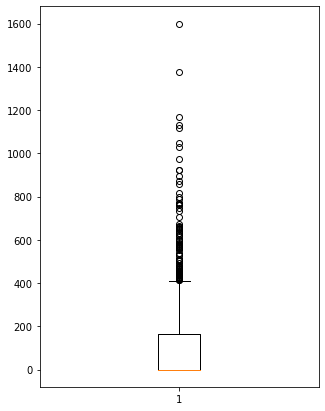

In [371]:
# Box plot helps in displaying the Outliers for Masonry Area
plt.figure(figsize=(5,7))
plt.boxplot(housing['MasVnrArea'])
plt.show()

In [187]:
housing.shape

(1460, 80)

In [372]:
#Percentiles for the outlier treatment
numeric_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,Age,Remod_Age,Garage_Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.199658,10516.828082,1.995890,0.090411,3.591781,3.814384,3.998630,2.937671,103.117123,...,3.409589,15.060959,2.758904,0.013014,0.565753,43.489041,180921.195890,36.547945,22.950000,139.076027
std,421.610009,22.431902,9981.264932,0.063996,0.372151,0.582296,0.606509,0.052342,0.276232,180.731373,...,29.317331,55.757415,40.177307,0.204059,1.204483,496.123024,79442.502883,30.250152,20.640653,453.714026
min,1.000000,21.000000,1300.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,60.000000,7553.500000,2.000000,0.000000,3.000000,4.000000,4.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000,4.000000,7.000000
50%,730.500000,70.000000,9478.500000,2.000000,0.000000,4.000000,4.000000,4.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000,14.000000,30.000000
75%,1095.250000,80.000000,11601.500000,2.000000,0.000000,4.000000,4.000000,4.000000,3.000000,164.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.000000,41.000000,50.000000
90%,1314.100000,92.000000,14381.700000,2.000000,0.000000,4.000000,4.000000,4.000000,3.000000,335.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,278000.000000,84.000000,56.000000,79.100000
95%,1387.050000,104.000000,17401.150000,2.000000,1.000000,4.000000,4.000000,4.000000,3.000000,456.000000,...,0.000000,160.000000,0.000000,0.000000,3.000000,0.000000,326100.000000,91.000000,58.000000,2006.000000
99%,1445.410000,137.410000,37567.640000,2.000000,2.000000,4.000000,4.000000,4.000000,3.000000,791.280000,...,168.000000,268.050000,0.000000,0.000000,4.000000,700.000000,442567.010000,110.410000,60.000000,2009.000000


In [373]:
def remove_outliers_num(dtf, numl_list):
    for j in numl_list:
        Q1 = dtf[j].quantile(0.05)
        Q3 = dtf[j].quantile(0.95)
        IQR = Q3 - Q1       
        dtf = dtf[(dtf[j] >= Q1-1.5*IQR) & (dtf[j] <= Q3+1.5*IQR)]
    return dtf

numeric_fields=list(numeric_data.columns)
housing=remove_outliers_num(housing,numeric_fields)

In [374]:
#Size of the datasert is reduced after removing outliers
housing.shape

(1232, 80)

<AxesSubplot:>

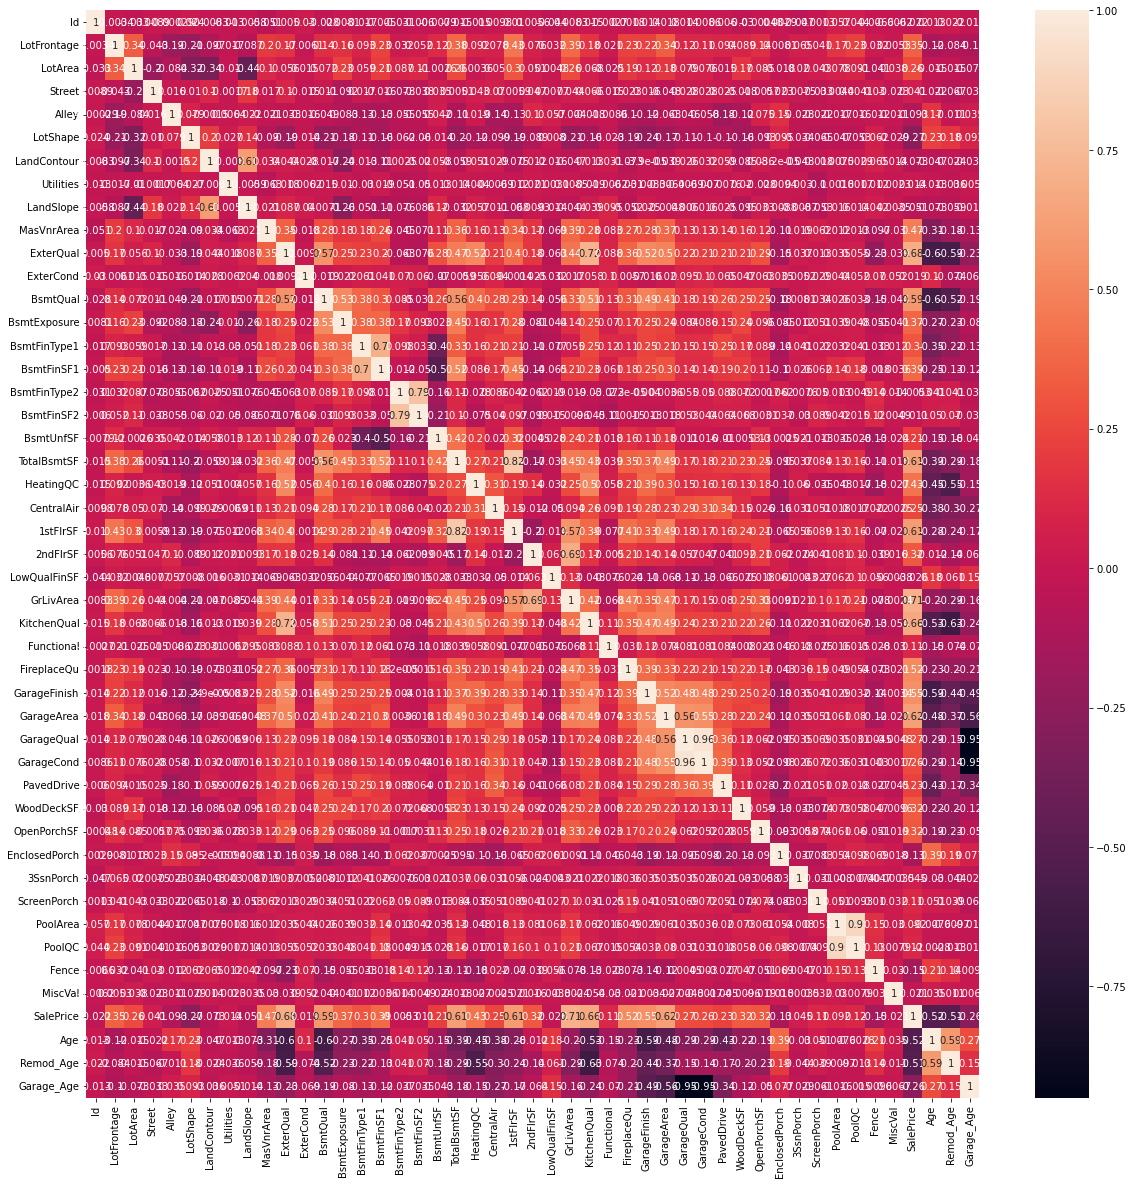

In [375]:
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(numeric_data.corr(),annot = True)

#Observation : The variables are showing both positive and negative collinearity

In [376]:
cols = corr.nlargest(15, 'SalePrice')['SalePrice'].index
cols
#Columns which have the high collinearity

Index(['SalePrice', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'GarageFinish', 'FireplaceQu',
       'MasVnrArea', 'HeatingQC', 'BsmtFinSF1', 'BsmtExposure', 'LotFrontage'],
      dtype='object')

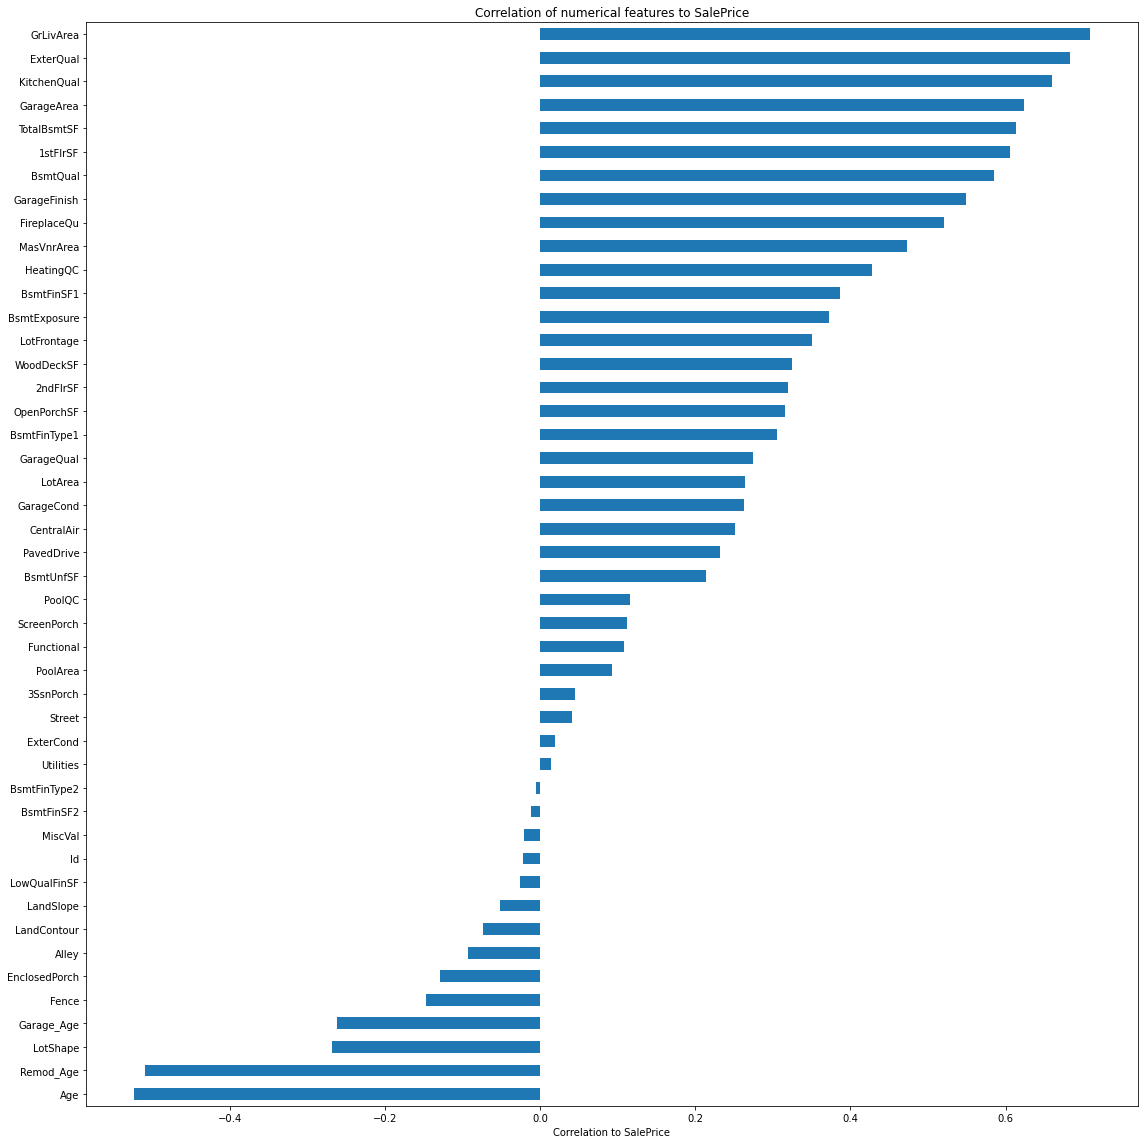

In [377]:
# Horizontal Bar chart which shows the correlation of the numeric variables and the SalePrice
corr = numeric_data.corr()

plt.figure(figsize=(16,16));
corr["SalePrice"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

In [378]:
categorical_features=housing.select_dtypes(include='object')
categorical_features.columns

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageCars', 'MiscFeature', 'SaleType',
       'SaleCondition', 'MonthSold'],
      dtype='object')

In [379]:
# convert into dummies
house_dummy_features = pd.get_dummies(categorical_features, drop_first=True)
house_dummy_features.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [380]:
#dropping original categorical columns
housing = housing.drop(list(categorical_features.columns), axis=1)
#concatenating dummy columns to original dataframe
housing.shape

(1232, 48)

In [381]:
#Combining the dummy features to the dataset
housing = pd.concat([housing,house_dummy_features], axis=1)
housing.shape

(1232, 253)

In [382]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)
print("Size of the train and test datasets")
print(df_train.shape)
print(df_test.shape)

#These 2 datasets will be used in the end to generated the predicted prices csv file 
final_train=df_train
final_test=df_test


Size of the train and test datasets
(862, 253)
(370, 253)


In [383]:
#Dropping the Id column
df_train = df_train.drop(['Id'], axis=1)
print(df_train.shape)
df_test = df_test.drop(['Id'], axis=1)
print(df_test.shape)

(862, 252)
(370, 252)


In [384]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables


X_train = df_train.drop(['SalePrice'], axis=1)
X_test = df_test.drop(['SalePrice'], axis=1)

#Converting SalePrice to log format
y_train = np.log(df_train.SalePrice) 
y_test = np.log(df_test.SalePrice)

In [385]:
y_train.head()

286    11.976659
723    11.813030
262    11.925035
541    12.421184
674    11.849398
Name: SalePrice, dtype: float64

In [386]:
Num_Vars_No_Price =['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'Age', 'Remod_Age',
       'Garage_Age']

X_train[Num_Vars_No_Price] = scaler.fit_transform(X_train[Num_Vars_No_Price])

X_test[Num_Vars_No_Price] = scaler.transform(X_test[Num_Vars_No_Price])
X_train.head()

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,MasVnrArea,ExterQual,...,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
286,0.366013,0.254453,0.0,0.0,0.5,0.666667,0.0,0.0,0.000000,0.333333,...,0,0,0,0,1,0,0,0,0,0
723,0.254902,0.206057,0.0,0.0,1.0,1.000000,0.0,0.0,0.000000,0.333333,...,0,0,0,0,0,0,1,0,0,0
262,0.437908,0.215022,0.0,0.0,0.5,1.000000,0.0,0.0,0.043935,0.333333,...,0,0,0,1,0,0,0,0,0,0
541,0.457516,0.290855,0.0,0.0,1.0,1.000000,0.0,0.0,0.068768,0.666667,...,0,0,0,0,1,0,0,0,0,0
674,0.385621,0.236882,0.0,0.0,1.0,1.000000,0.0,0.0,0.000000,0.333333,...,0,0,0,1,0,0,0,0,0,0


In [387]:
#RFE method 
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 107),
 ('LotArea', False, 29),
 ('Street', False, 27),
 ('Alley', False, 161),
 ('LotShape', False, 185),
 ('LandContour', False, 171),
 ('Utilities', False, 26),
 ('LandSlope', False, 25),
 ('MasVnrArea', False, 118),
 ('ExterQual', False, 203),
 ('ExterCond', False, 143),
 ('BsmtQual', False, 201),
 ('BsmtCond', False, 193),
 ('BsmtExposure', False, 105),
 ('BsmtFinType1', False, 153),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 137),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 100),
 ('CentralAir', False, 135),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 21),
 ('GrLivArea', True, 1),
 ('KitchenQual', False, 177),
 ('Functional', False, 169),
 ('FireplaceQu', False, 206),
 ('GarageFinish', False, 207),
 ('GarageArea', False, 80),
 ('GarageQual', False, 47),
 ('GarageCond', False, 120),
 ('PavedDrive', False, 230),
 ('WoodDeckSF', False, 133),
 ('OpenPorchSF', False, 142

In [388]:
col = X_train.columns[rfe.support_]
print(col)
X_train.columns[~rfe.support_]

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', '3SsnPorch', 'MiscVal',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'GarageType_No_Garage',
       'GarageCars_1', 'GarageCars_2', 'GarageCars_3', 'GarageCars_4'],
      dtype='object')


Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'MasVnrArea', 'ExterQual',
       ...
       'MonthSold_December', 'MonthSold_February', 'MonthSold_January',
       'MonthSold_July', 'MonthSold_June', 'MonthSold_March', 'MonthSold_May',
       'MonthSold_November', 'MonthSold_October', 'MonthSold_September'],
      dtype='object', length=236)

In [389]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
#inf VIF values show high multicollinearity

,Features,VIF
0,BsmtFinSF1,inf
1,BsmtFinSF2,inf
2,BsmtUnfSF,inf
3,TotalBsmtSF,inf
4,1stFlrSF,inf
5,2ndFlrSF,inf
6,GrLivArea,inf
12,GarageCars_2,8.81
13,GarageCars_3,4.98
11,GarageCars_1,3.47


In [390]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     363.7
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          3.30e-299
Time:                        21:19:09   Log-Likelihood:                 319.97
No. Observations:                 862   AIC:                            -617.9
Df Residuals:                     851   BIC:                            -565.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [391]:
#Residual Analysis of the Train dataset:

y_train_pred = lr1.predict(X_train_lm1)

res = y_train-y_train_pred

print("R-squared value for Linear Regression: ",r2_score(y_train, y_train_pred))

R-squared value for Linear Regression:  0.8103818844572026


In [392]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_pred))
print("\nResidual Sum of Squares value of  Linear Regression: ",rss)
mse = mean_squared_error(y_train, y_train_pred)
print("\nMean Squared Error value of  Linear Regression: ",mse)
# Root Mean Squared Error
rmse = mse**0.5
print("\nRoot Mean Squared Error of  Linear Regression: ",rmse)


Residual Sum of Squares value of  Linear Regression:  24.022237622035618

Mean Squared Error value of  Linear Regression:  0.027868025083568

Root Mean Squared Error of  Linear Regression:  0.16693718903697882


In [ ]:
#Since the data in non linear and the Error terms are high, we are proceeding with Ridge and Lasso Regression

In [393]:
#Ridge Regression
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [394]:
print("Optimum alpha value for Ridge:",model_cv.best_params_)
print(model_cv.best_score_)

Optimum alpha value for Ridge: {'alpha': 1}
-0.07575753427050667


In [395]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013137,0.003758,0.003528,0.003154,0.001,{'alpha': 0.001},-0.077904,-0.077207,-0.080852,-0.083947,...,-0.080153,0.002413,5,-0.047950,-0.049497,-0.049280,-0.049724,-0.048726,-0.049035,0.000636
1,0.009684,0.007932,0.000000,0.000000,0.01,{'alpha': 0.01},-0.075629,-0.076847,-0.080932,-0.083197,...,-0.079238,0.002735,3,-0.048359,-0.049618,-0.049368,-0.049822,-0.048913,-0.049216,0.000525
2,0.015016,0.003624,0.002203,0.003125,0.1,{'alpha': 0.1},-0.073197,-0.073894,-0.080380,-0.082690,...,-0.077609,0.003656,2,-0.049971,-0.050862,-0.050346,-0.050574,-0.050401,-0.050431,0.000292
3,0.001001,0.002003,0.006252,0.007657,1,{'alpha': 1},-0.073677,-0.070175,-0.075589,-0.079976,...,-0.075758,0.003644,1,-0.055199,-0.055982,-0.055169,-0.053816,-0.054312,-0.054896,0.000755
4,0.013093,0.004089,0.001624,0.001989,10,{'alpha': 10},-0.082222,-0.075662,-0.073519,-0.081743,...,-0.079577,0.004252,4,-0.067335,-0.066910,-0.067538,-0.065521,-0.065633,-0.066587,0.000850
5,0.006026,0.007389,0.006359,0.007788,100,{'alpha': 100},-0.105221,-0.095135,-0.098436,-0.106787,...,-0.103277,0.005701,6,-0.096505,-0.097852,-0.098015,-0.096227,-0.095543,-0.096828,0.000956


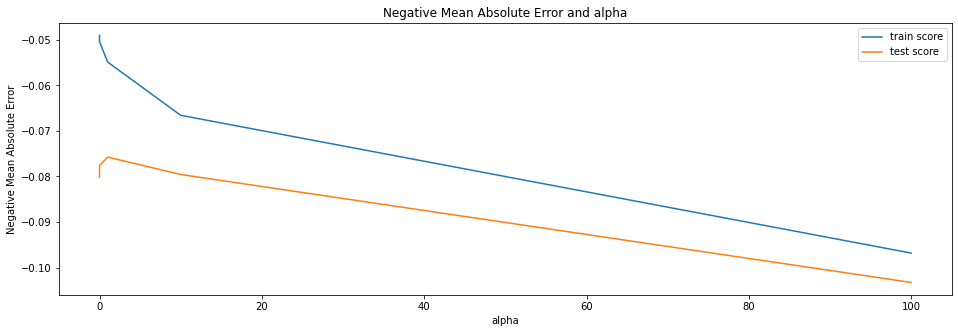

In [396]:
#plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [397]:
#Ridge model coefficients on choosing the optimum value of alpha
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.70796675e-02,  2.19233984e-01,  0.00000000e+00,  1.98581871e-02,
        1.72302923e-02,  1.51121817e-02,  0.00000000e+00,  0.00000000e+00,
        3.88123527e-02,  1.78371949e-02, -2.39672798e-02,  4.32417065e-02,
        5.05251520e-03,  7.96904147e-02,  2.33969754e-02,  1.94088967e-01,
       -3.66383314e-02,  5.80028537e-02,  4.90956509e-02,  1.82525673e-01,
        6.09756435e-02,  6.95673923e-02,  2.52544252e-01,  1.41034060e-01,
        0.00000000e+00,  3.32787262e-01,  3.34657081e-02,  3.30467494e-02,
        4.25448273e-02,  1.87870569e-02,  1.17171483e-01,  3.79981194e-02,
        8.01906552e-02,  1.79739528e-02,  4.76933081e-02,  2.85359914e-02,
        3.11932781e-02,  0.00000000e+00,  9.14030109e-02,  0.00000000e+00,
        0.00000000e+00, -1.74500052e-02,  0.00000000e+00, -1.54271685e-01,
       -5.58252402e-02,  1.52239840e-02,  1.09819509e-02,  7.17162136e-03,
        3.91981132e-02,  4.90659022e-02,  4.47329167e-02,  1.58570254e-02,
       -5.37054004e-03,  

In [398]:
from sklearn import metrics
#lets predict the R-squared value of test and train data
y_train_pred_R = ridge.predict(X_train)
print("R-squared value of train data for Ridge: ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred_R))

y_test_pred_R = ridge.predict(X_test)
print("R-squared value of test data for Ridge: ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred_R))

R-squared value of train data for Ridge:  0.957908126441241
R-squared value of test data for Ridge:  0.8997785009758426


In [399]:
from sklearn.metrics import mean_squared_error
print ('RMSE of Ridge Regression is:', mean_squared_error(y_test, y_test_pred_R))

RMSE of Ridge Regression is: 0.014609513745403948


In [400]:
# Ridge Regression model parameters: 
model_params_R = list(ridge.coef_)
model_params_R.insert(0, ridge.intercept_)
model_params_R = [round(x, 2) for x in model_params_R]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params_R))

[('constant', 10.64),
 ('LotFrontage', 0.06),
 ('LotArea', 0.22),
 ('Street', 0.0),
 ('Alley', 0.02),
 ('LotShape', 0.02),
 ('LandContour', 0.02),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('MasVnrArea', 0.04),
 ('ExterQual', 0.02),
 ('ExterCond', -0.02),
 ('BsmtQual', 0.04),
 ('BsmtCond', 0.01),
 ('BsmtExposure', 0.08),
 ('BsmtFinType1', 0.02),
 ('BsmtFinSF1', 0.19),
 ('BsmtFinType2', -0.04),
 ('BsmtFinSF2', 0.06),
 ('BsmtUnfSF', 0.05),
 ('TotalBsmtSF', 0.18),
 ('HeatingQC', 0.06),
 ('CentralAir', 0.07),
 ('1stFlrSF', 0.25),
 ('2ndFlrSF', 0.14),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.33),
 ('KitchenQual', 0.03),
 ('Functional', 0.03),
 ('FireplaceQu', 0.04),
 ('GarageFinish', 0.02),
 ('GarageArea', 0.12),
 ('GarageQual', 0.04),
 ('GarageCond', 0.08),
 ('PavedDrive', 0.02),
 ('WoodDeckSF', 0.05),
 ('OpenPorchSF', 0.03),
 ('EnclosedPorch', 0.03),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.09),
 ('PoolArea', 0.0),
 ('PoolQC', 0.0),
 ('Fence', -0.02),
 ('MiscVal', 0.0),
 ('Age', -0.15),
 

In [401]:
y_test_pred_R.shape
sales_predictions_test = np.exp(y_test_pred_R)

sales_train = np.exp(y_test)

salespriceprediction= pd.DataFrame({'Id': final_test['Id'] ,'SalePrice': final_test['SalePrice'],'Predicted_SalePrice': sales_predictions_test})
salespriceprediction.to_csv("C:/Users/Teenu/Python_practice/Adv_Regression_Assignment/salespriceprediction_test.csv",index=False)

In [402]:
#Lasso regression:
lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [404]:
cv_results_l = pd.DataFrame(model_cv_l.cv_results_)
#checking the value of optimum number of parameters
print("Optimum alpha value for Lasso:",model_cv_l.best_params_)
print(model_cv_l.best_score_)

Optimum alpha value for Lasso: {'alpha': 0.001}
-0.07598849006796203


In [405]:
#lasso model using the alpha value from above
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [406]:
#lets predict the R-squared value of train data
y_train_pred_L = lasso.predict(X_train)
print("R-squared value of train data for Lasso: ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred_L))

#lets predict the R-squared value of test data
y_test_pred_L = lasso.predict(X_test)
print("\nR-squared value of test data for Lasso: ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred_L))

print ("\nRMSE for Lasso Regression is: ", mean_squared_error(y_test, y_test_pred_L))

R-squared value of train data for Lasso:  0.9379007267523319

R-squared value of test data for Lasso:  0.8872467463634593

RMSE for Lasso Regression is:  0.016436295853497457


In [407]:
# Lasso model parameters
model_params_L = list(lasso.coef_)
model_params_L.insert(0, lasso.intercept_)
model_params_L = [round(x, 3) for x in model_params_L]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params_L))

[('constant', 11.169),
 ('LotFrontage', 0.038),
 ('LotArea', 0.162),
 ('Street', 0.0),
 ('Alley', -0.0),
 ('LotShape', -0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.053),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.004),
 ('BsmtExposure', 0.051),
 ('BsmtFinType1', 0.027),
 ('BsmtFinSF1', 0.159),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.281),
 ('HeatingQC', 0.057),
 ('CentralAir', 0.074),
 ('1stFlrSF', 0.013),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.682),
 ('KitchenQual', 0.029),
 ('Functional', 0.013),
 ('FireplaceQu', 0.059),
 ('GarageFinish', 0.042),
 ('GarageArea', 0.126),
 ('GarageQual', 0.0),
 ('GarageCond', 0.0),
 ('PavedDrive', 0.026),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.009),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.045),
 ('PoolArea', 0.0),
 ('PoolQC', 0.0),
 ('Fence', -0.0),
 ('MiscVal', 0.0),
 ('Age', -

In [ ]:
#Inferences: Ridge model has performed better than the Lasso model since it has a lower RMES value and better R-sq values for the train and the test datasets.

#R-squared value of train data for Ridge:  0.957908126441241
#R-squared value of test data for Ridge:  0.8997785009758426
#RMSE of Ridge Regression is: 0.014609513745403948
#R-squared value of train data for Lasso:  0.9379007267523319
#R-squared value of test data for Lasso:  0.8872467463634593
#RMSE for Lasso Regression is:  0.016436295853497457


In [ ]:
#Below are the solutions for the subjective question 1:What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

#Ridge Regression when alpha value is doubled , alpha=2*1

In [408]:
alpha = 2
ridge_2 = Ridge(alpha=alpha)

ridge_2.fit(X_train, y_train)
ridge_2.coef_
#Ridge regression coefficients have reduced


array([ 5.93103764e-02,  1.87895903e-01,  0.00000000e+00,  1.62604234e-02,
        1.49159927e-02,  1.08474239e-02,  0.00000000e+00,  0.00000000e+00,
        4.13590696e-02,  2.70617665e-02, -1.86606050e-02,  4.85497445e-02,
        4.89523146e-03,  7.38292822e-02,  2.77266898e-02,  1.89706309e-01,
       -2.64152635e-02,  4.81895436e-02,  4.92995078e-02,  1.76694291e-01,
        6.05627748e-02,  7.40826785e-02,  2.29665430e-01,  1.22573543e-01,
        0.00000000e+00,  2.99368760e-01,  3.80167270e-02,  3.14775167e-02,
        5.01094341e-02,  2.32013029e-02,  1.12698377e-01,  3.08386135e-02,
        5.93030714e-02,  2.36687815e-02,  4.79733477e-02,  3.15518845e-02,
        3.20575558e-02,  0.00000000e+00,  8.64419321e-02,  0.00000000e+00,
        0.00000000e+00, -1.68898720e-02,  0.00000000e+00, -1.16295107e-01,
       -6.13977682e-02,  3.74732978e-03,  1.04135873e-02, -1.04481317e-02,
        2.83300075e-02,  3.61844964e-02,  2.76177693e-02,  1.60527076e-02,
       -6.27465613e-03,  

In [409]:
from sklearn import metrics
#lets predict the R-squared value of test and train data
y_train_pred_R_2 = ridge_2.predict(X_train)
print("R-squared value of train data for Ridge scenario2: ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred_R_2))

y_test_pred_R_2 = ridge_2.predict(X_test)
print("R-squared value of test data for Ridge scenario2: ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred_R_2))
from sklearn.metrics import mean_squared_error
print ('RMSE of Ridge Regression for scenario2 is:', mean_squared_error(y_test, y_test_pred_R_2))

R-squared value of train data for Ridge scenario2:  0.954525309030501
R-squared value of test data for Ridge scenario2:  0.8986029906331785
RMSE of Ridge Regression for scenario2 is: 0.014780870536873162


In [410]:
# Ridge Regression model parameters scenario 2: 
model_params_R_2 = list(ridge_2.coef_)
model_params_R_2.insert(0, ridge_2.intercept_)
model_params_R_2 = [round(x, 2) for x in model_params_R_2]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params_R_2))

[('constant', 10.84),
 ('LotFrontage', 0.06),
 ('LotArea', 0.19),
 ('Street', 0.0),
 ('Alley', 0.02),
 ('LotShape', 0.01),
 ('LandContour', 0.01),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('MasVnrArea', 0.04),
 ('ExterQual', 0.03),
 ('ExterCond', -0.02),
 ('BsmtQual', 0.05),
 ('BsmtCond', 0.0),
 ('BsmtExposure', 0.07),
 ('BsmtFinType1', 0.03),
 ('BsmtFinSF1', 0.19),
 ('BsmtFinType2', -0.03),
 ('BsmtFinSF2', 0.05),
 ('BsmtUnfSF', 0.05),
 ('TotalBsmtSF', 0.18),
 ('HeatingQC', 0.06),
 ('CentralAir', 0.07),
 ('1stFlrSF', 0.23),
 ('2ndFlrSF', 0.12),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.3),
 ('KitchenQual', 0.04),
 ('Functional', 0.03),
 ('FireplaceQu', 0.05),
 ('GarageFinish', 0.02),
 ('GarageArea', 0.11),
 ('GarageQual', 0.03),
 ('GarageCond', 0.06),
 ('PavedDrive', 0.02),
 ('WoodDeckSF', 0.05),
 ('OpenPorchSF', 0.03),
 ('EnclosedPorch', 0.03),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.09),
 ('PoolArea', 0.0),
 ('PoolQC', 0.0),
 ('Fence', -0.02),
 ('MiscVal', 0.0),
 ('Age', -0.12),
 ('

In [ ]:
#Lasso Regression subjection question1 :when alpha value is doubled , alpha=2*0.001

In [411]:
alpha = 0.002

lasso_2 = Lasso(alpha=alpha)
        
lasso_2.fit(X_train, y_train) 


Lasso(alpha=0.002)

In [412]:
#lets predict the R-squared value of train data
y_train_pred_L_2 = lasso_2.predict(X_train)
print("R-squared value of train data for Lasso scenario2: ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred_L_2))

#lets predict the R-squared value of test data
y_test_pred_L_2 = lasso_2.predict(X_test)
print("\nR-squared value of test data for Lasso scenario2: ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred_L_2))

print ("\nRMSE for Lasso Regression scenario2 is: ", mean_squared_error(y_test, y_test_pred_L_2))

R-squared value of train data for Lasso scenario2:  0.9195454984361487

R-squared value of test data for Lasso scenario2:  0.8696001408935818

RMSE for Lasso Regression scenario2 is:  0.019008681296562458


In [413]:
# Lasso model parameters
model_params_L_2 = list(lasso_2.coef_)
model_params_L_2.insert(0, lasso_2.intercept_)
model_params_L_2 = [round(x, 3) for x in model_params_L_2]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params_L_2))


[('constant', 11.198),
 ('LotFrontage', 0.01),
 ('LotArea', 0.112),
 ('Street', 0.0),
 ('Alley', -0.0),
 ('LotShape', -0.0),
 ('LandContour', -0.0),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.076),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.011),
 ('BsmtExposure', 0.032),
 ('BsmtFinType1', 0.024),
 ('BsmtFinSF1', 0.161),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.257),
 ('HeatingQC', 0.056),
 ('CentralAir', 0.073),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.687),
 ('KitchenQual', 0.049),
 ('Functional', 0.0),
 ('FireplaceQu', 0.076),
 ('GarageFinish', 0.058),
 ('GarageArea', 0.112),
 ('GarageQual', 0.0),
 ('GarageCond', 0.0),
 ('PavedDrive', 0.029),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.006),
 ('PoolArea', 0.0),
 ('PoolQC', 0.0),
 ('Fence', -0.0),
 ('MiscVal', 0.0),
 ('Age', -0.028),


In [416]:
#Solution for Question 3 in subjective questions:
#create another model excluding the five most important predictor variables
#The 5 most important variables :'GrLivArea','TotalBsmtSF','OverallQual_9','LotArea','BsmtFinSF1'

#Lasso regression for Question 3:
lasso = Lasso()

L3_X_train=X_train
L3_X_test=X_test
print("Before removing the important predictor variables")
print(L3_X_train.shape)
print(L3_X_test.shape)
L3_X_train = L3_X_train.drop(['GrLivArea','TotalBsmtSF','OverallQual_9','LotArea','BsmtFinSF1'], axis=1)
L3_X_test = L3_X_test.drop(['GrLivArea','TotalBsmtSF','OverallQual_9','LotArea','BsmtFinSF1'], axis=1)
print("After removing the important predictor variables")
print(L3_X_train.shape)
print(L3_X_test.shape)
# cross validation
model_cv_l_3 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l_3.fit(L3_X_train, y_train)


Before removing the important predictor variables
(862, 251)
(370, 251)
After removing the important predictor variables
(862, 246)
(370, 246)
Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [417]:
model_cv_l_3.fit(L3_X_train, y_train)

cv_results_l_3 = pd.DataFrame(model_cv_l_3.cv_results_)
#checking the value of optimum number of parameters
print(model_cv_l_3.best_params_)
print(model_cv_l_3.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'alpha': 0.001}
-0.08335753037485984


In [422]:
#lasso model using the alpha value from above
alpha = 0.001

lasso_3 = Lasso(alpha=alpha)
        
lasso_3.fit(L3_X_train, y_train) 

Lasso(alpha=0.001)

In [423]:
#lets predict the R-squared value of train data
y_train_pred_L_3 = lasso_3.predict(L3_X_train)
print("R-squared value of train data for Lasso scenario 3: ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred_L_3))

#lets predict the R-squared value of test data
y_test_pred_L_3 = lasso_3.predict(L3_X_test)
print("\nR-squared value of test data for Lasso scenario 3: ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred_L_3))

print ("\nRMSE for Lasso Regression scenario 3 is: ", mean_squared_error(y_test, y_test_pred_L_3))



R-squared value of train data for Lasso scenario 3:  0.9285228992960912

R-squared value of test data for Lasso scenario 3:  0.8816911456687796

RMSE for Lasso Regression scenario 3 is:  0.017246148285392695


In [424]:
# Lasso model parameters
model_params_L_3 = list(lasso_3.coef_)
model_params_L_3.insert(0, lasso_3.intercept_)
model_params_L_3 = [round(x, 2) for x in model_params_L_3]
cols = L3_X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params_L_3))


[('constant', 11.07),
 ('LotFrontage', 0.09),
 ('Street', 0.0),
 ('Alley', -0.0),
 ('LotShape', -0.0),
 ('LandContour', -0.0),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('MasVnrArea', 0.02),
 ('ExterQual', 0.09),
 ('ExterCond', -0.0),
 ('BsmtQual', 0.11),
 ('BsmtCond', 0.01),
 ('BsmtExposure', 0.08),
 ('BsmtFinType1', 0.07),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', -0.0),
 ('HeatingQC', 0.06),
 ('CentralAir', 0.08),
 ('1stFlrSF', 0.94),
 ('2ndFlrSF', 0.33),
 ('LowQualFinSF', 0.0),
 ('KitchenQual', 0.05),
 ('Functional', 0.04),
 ('FireplaceQu', 0.05),
 ('GarageFinish', 0.06),
 ('GarageArea', 0.15),
 ('GarageQual', 0.0),
 ('GarageCond', 0.0),
 ('PavedDrive', 0.01),
 ('WoodDeckSF', 0.02),
 ('OpenPorchSF', 0.02),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.05),
 ('PoolArea', 0.0),
 ('PoolQC', 0.0),
 ('Fence', -0.01),
 ('MiscVal', 0.0),
 ('Age', -0.02),
 ('Remod_Age', -0.07),
 ('Garage_Age', -0.0),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', 0.0